# 0.1.2: Explore sPlot Data


## Imports and config


In [2]:
from pathlib import Path

import pandas as pd

from src.conf.conf import get_config
from src.conf.environment import log

cfg = get_config()

%load_ext autoreload
%autoreload 2

splot_prep_dir = Path(cfg.interim_dir, cfg.splot.interim.dir, cfg.splot.interim.extracted)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Explore the extracted data


In [3]:
header_df = pd.read_parquet(splot_prep_dir / "header.parquet")
vegetation_df = pd.read_parquet(splot_prep_dir / "vegetation.parquet")
trait_df = pd.read_parquet(splot_prep_dir / "trait.parquet")

### `header`


The `header` `DataFrame` contains plot-level metadata, the most important of which will likely be:

- `PlotObservationID`
- `Latitude` and `Longitude`


In [7]:
pd.set_option('display.max_columns', None)
header_df.head()

,PlotObservationID,Dataset,GIVD_NU,RESURVEY,RS_PLOT,RS_OBSERV,Nested_in,Longitude,Latitude,Location_uncertainty,Location_origin,Locality,Country,Subregion,Continent,Date,Releve_area,Cover_scale,Plants_recorded,Lichens_identified,Mosses_identified,FL_full,FL_name,FL_code,FL_first,FL_second,FL_third,EUNIS,EUNIS_old,EUNIS_coal,EUNIS_first,EUNIS_second,EUNIS_third,Naturalness,Grassland,Shrubland,Forest,Wetland,Sparse_vegetation,Cover_total,Cover_cryptogams,Cover_forbs,Cover_bare_soil,Cover_bare_rock,Cover_open_water,Cover_layer_litter,Cover_layer_algae,Cover_layer_lichen,Cover_layer_moss,Cover_layer_herb,Cover_layer_shrub,Cover_layer_tree,Max_height_cryptogams_mm,Avg_height_low_herbs_cm,Avg_height_high_herbs_cm,Max_height_herbs_cm,Height_low_shrubs_m,Height_high_shrubs_m,Height_low_trees_m,Height_high_trees_m,Altitude,Aspect,Slope,LOC_METHOD,MANIPULATE,MANIPTYP,Original_field_number,Original_number_database,Original_table,Original_number_table,Biblioreference,Author,Project,Publication_date,Remarks
1,1,Aava,NA-US-014,False,NaN,NaN,<NA>,-149.593200,68.624900,-12.5,informed,<NA>,United States,Northern America,North America,1989-08-01,NaN,Braun-Blanquet,<NA>,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,False,<NA>,False,False,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,701.0,360.0,2.0,NaN,False,<NA>,SWT-1,<NA>,6,SWT-1,<NA>,"Donald ""Skip"" A. Walker",<NA>,NaN,"Moist Carpod, Salcha, Potfru sedge, forb tundr..."
2,2,Aava,NA-US-014,False,NaN,NaN,<NA>,-149.591996,68.625311,-12.5,informed,<NA>,United States,Northern America,North America,1989-08-01,NaN,Braun-Blanquet,<NA>,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,False,<NA>,False,False,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,701.0,360.0,2.0,NaN,False,<NA>,SWT-2,<NA>,6,SWT-2,<NA>,"Donald ""Skip"" A. Walker",<NA>,NaN,"Moist Salala, Calcan, Astsib tall shrubland, T..."
3,3,Aava,NA-US-014,False,NaN,NaN,<NA>,-149.595261,68.624417,-12.5,informed,<NA>,United States,Northern America,North America,1989-08-02,NaN,Braun-Blanquet,<NA>,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,False,<NA>,False,False,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,701.0,360.0,5.0,NaN,False,<NA>,SWT-3,<NA>,6,SWT-3,<NA>,"Donald ""Skip"" A. Walker",<NA>,NaN,"Dry Betnan, Leddec, Claarb, dwarf-shrub, liche..."
4,4,Aava,NA-US-014,False,NaN,NaN,<NA>,-149.597946,68.624690,-12.5,informed,<NA>,United States,Northern America,North America,1989-08-02,NaN,Braun-Blanquet,<NA>,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,False,<NA>,False,False,NaN,NaN,1.0,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,701.0,NaN,0.0,NaN,False,<NA>,SWT-4,<NA>,6,SWT-4,<NA>,"Donald ""Skip"" A. Walker",<NA>,NaN,Unknown cyanobacteria = in orig. Nostoc commun...
5,5,Aava,NA-US-014,False,NaN,NaN,<NA>,-149.595704,68.623723,-12.5,informed,<NA>,United States,Northern America,North America,1989-08-02,NaN,Braun-Blanquet,<NA>,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,False,<NA>,False,False,NaN,NaN,1.0,NaN,5.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,701.0,360.0,2.0,NaN,False,<NA>,SWT-5,<NA>,6,SWT-5,<NA>,"Donald ""Skip"" A. Walker",<NA>,NaN,"Dry Arcalp, Hiealp, dwarf-shrub, lichen tundra..."


Each row corresponds to a unique plot, so we can get a count of the total plots by simply looking at the shape.


In [5]:
print(f"Total plot count: {header_df['PlotObservationID'].nunique():,}")

Total plot count: 2,536,019


In [12]:
print(
    f"Number of unique plot locations: {header_df.set_index(['Longitude', 'Latitude']).index.nunique():,}"
)

Number of unique plot locations: 1,253,916


### Country

In [15]:
print(f"Total number of countries: {header_df['Country'].nunique():,}")
print(f"\nTop 10 countries by plot count:")
header_df.Country.value_counts(ascending=False).head(10)

Total number of countries: 147

Top 10 countries by plot count:


Country
Denmark               376046
France                211760
Germany               206377
Netherlands           174442
Czech Republic        125416
Spain                 104905
United Kingdom         91455
Poland                 89181
United States          87458
Russian Federation     80534
Name: count, dtype: Int64

In [16]:
print(f"Bottom 10 countries by plot count:")
header_df.Country.value_counts(ascending=True).head(10)

Bottom 10 countries by plot count:


Country
Western Sahara               1
French Guyana                2
Liechtenstein                3
Ghana                        4
Afghanistan                  5
Dominican Republic           8
French Guiana               10
Central African Republic    10
Mauritius                   10
Niger                       10
Name: count, dtype: Int64

### Plot the geographic distribution and density of sPlot plots

In [20]:
import geopandas as gpd

plots = header_df[["PlotObservationID", "Longitude", "Latitude"]].drop_duplicates()
plots = gpd.GeoDataFrame(
    plots[["PlotObservationID"]],
    geometry=gpd.points_from_xy(plots.Longitude, plots.Latitude),
    crs="EPSG:4326",
).to_crs("EPSG:6933")

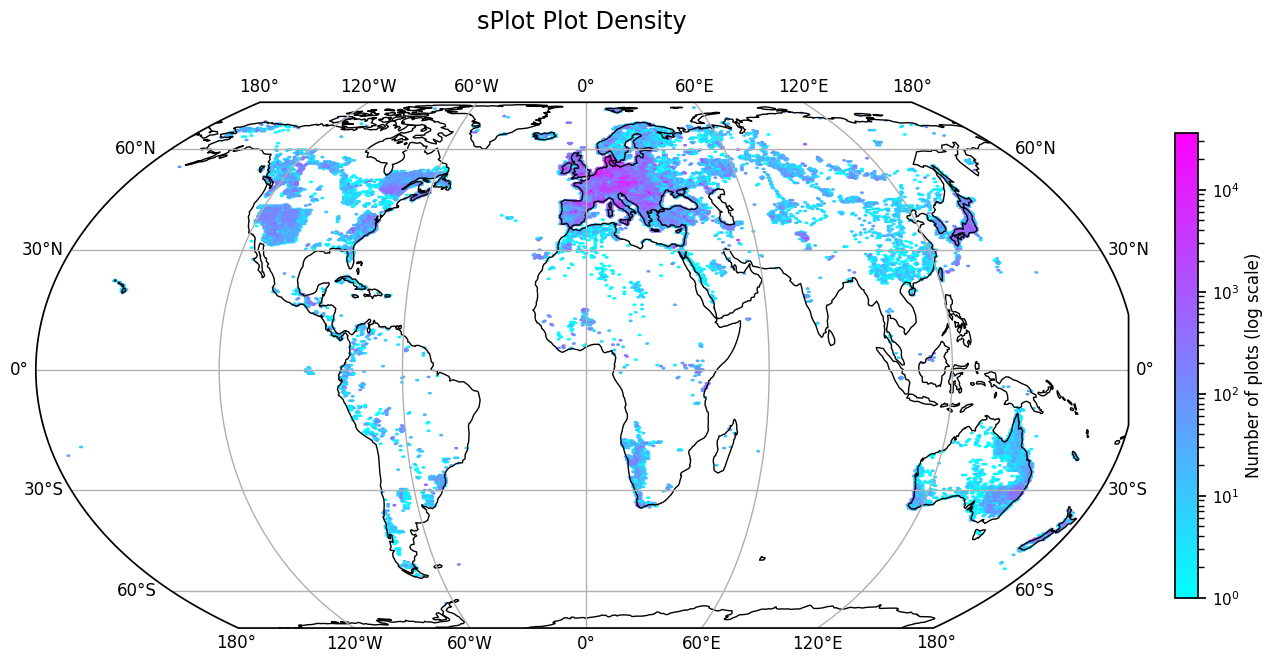

In [98]:
import numpy as np

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import seaborn as sns


with sns.plotting_context("notebook", font_scale=1):
    fig, ax = plt.subplots(
        1, 1, figsize=(15, 10), subplot_kw={"projection": ccrs.EqualEarth()}
    )

    # Plot the hexbinned density map with log scale
    hb = ax.hexbin(
        plots.geometry.x,
        plots.geometry.y,
        gridsize=400,
        bins="log",
        cmap="cool",
        mincnt=1,
        transform=ccrs.CRS("EPSG:6933"),
    )


    ax.coastlines()
    ax.gridlines(draw_labels=True)

    # Adjust the colorbar to be no taller than the map
    cbar = plt.colorbar(hb, ax=ax, fraction=0.02, pad=0.04)
    cbar.set_label("Number of plots (log scale)")

    plt.title("sPlot Plot Density", fontsize="x-large", pad=35)
    plt.show()

Plot the density with marginal histograms

ValueError: not enough values to unpack (expected 2, got 1)

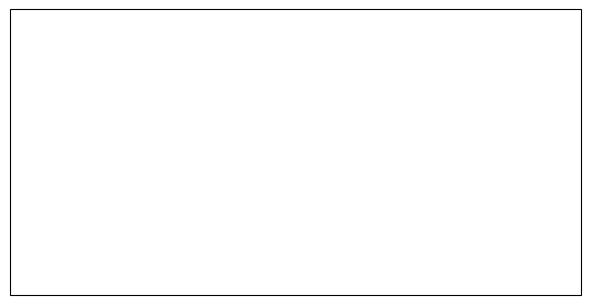

In [70]:
fig = plt.figure(figsize=(10, 8))
gs = fig.add_gridspec(4, 4, hspace=0.25, wspace=0.25)

ax_map = fig.add_subplot(gs[1:4, 0:3], projection=ccrs.PlateCarree())
# ax_map.set_extent([-100, -60, 30, 50], crs=ccrs.PlateCarree())

x = plots.geometry.x
y = plots.geometry.y
x_bins = np.linspace(x.min(), x.max(), 50)
y_bins = np.linspace(y.min(), y.max(), 50)
density, xedges, yedges = np.histogram2d(
    x, y, bins=[x_bins, y_bins]
)

ax_map.imshow(
    x,
    y,
    # origin="lower",
    # extent=[x.min(), x.max(), y.min(), y.max()],
    cmap="viridis",
    # alpha=0.7,
    transform=ccrs.EqualEarth(),
)

#### Check for duplicate plots


Some plots have been surveyed across multiple years, or have grown (or shrunk) in size. Others may have simply been included in multiple data sources. We want to avoid counting duplicate plots when it comes time to grid the data so that we don't inflate CWM values within grid cells.

Let's see if we have any duplicate plot locations.


In [5]:
duped_locs = header_df.duplicated(subset=["Longitude", "Latitude"], keep=False)
print(
    f"Number of duplicated lat/lon combinations: "
    f"{duped_locs.sum():,} ({duped_locs.mean():.2%})"
)

Number of duplicated lat/lon combinations: 1,543,424 (60.86%)


That's a lot of duplicate locations. Let's go ahead and separate out the non-duplicate plots and write them to disk.


Almost 61% of the plots have duplicate coordinates!

And what about resurveys?


In [6]:
duped_plots = header_df[duped_locs].groupby(
    ["Longitude", "Latitude"]
)

resurveyed_locs = duped_plots["RESURVEY"].any().sum()

print(
    f"Number of duplicated locations where at least one plot has resurvey as True: "
    f"{resurveyed_locs:,} ({resurveyed_locs / duped_plots.ngroups:.2%})"
)

Number of duplicated locations where at least one plot has resurvey as True: 55,541 (21.25%)


Let's see if they are simply observations from different dates, or if they are duplicate collections from different data sources...


In [7]:
unique_date_counts = duped_plots["Date"].nunique()
print(
    "Number of duplicated lat/lon combinations that have the same date across all duplicates:\n"
    f"{(unique_date_counts == 1).sum():,} ({(unique_date_counts == 1).mean():.2%})"
)

Number of duplicated lat/lon combinations that have the same date across all duplicates:
101,702 (38.92%)


In [8]:
# Create a boolean mask for the duplicated rows
duped_locs_dates = header_df.duplicated(subset=["Longitude", "Latitude", "Date"], keep=False)

# Filter the DataFrame using the mask
duped_plots_and_dates = header_df[duped_locs_dates]

# Group by "Longitude", "Latitude", and "Date" and check if "RESURVEY" is True in any of the rows in each group
resurveyed_locs_and_dates = duped_plots_and_dates.groupby(["Longitude", "Latitude", "Date"])["RESURVEY"].any().sum()

print(
    f"Number of duplicated locations and dates where at least one plot has resurvey as True: "
    f"{resurveyed_locs_and_dates:,} ({resurveyed_locs_and_dates / len(duped_plots_and_dates):.2%})"
)

Number of duplicated locations and dates where at least one plot has resurvey as True: 16,645 (1.47%)


~40% of the plots with identical lat/lon combinations as others also contain the same date of entry, but only ~1.5% of those are marked as resurveys. What should we do with this data? We can't be sure that plots with duplicate locations are actually the same plots, as this often occurs when researchers input only the location information of the nearest town or known point, so without more information, we can't know for sure which resurveys are of which plots.

#### Filtering plan

1. Calculate CWM trait values for each plot, including those with duplicate locations
2. For duplicate locations, take mean of traits

If we assume that truly separate plots can have the same location information due to collection practices, then we cannot discard plots with duplicate locations, even if their collection dates differ, or if some are indicated as resurveys.

This could theoretically be done with more sophisticated filtering, where one compares similarity in species abundances for duplicated plot locations across time, but that may also require site-specific knowledge as well as stronger domain-specific knowledge when it comes to interpreting the many descriptors for each plot.

**Ultimately, since we can't know if plots with the same location are truly duplicates, and therefore we want to avoid completely discarding potentially useful trait information, we can take a simple average of all community-weighted mean trait values across plots with the same location.**


#### Understanding PFT information


There are a number of different habitat/ecosystem/PFT-related indicators in sPlot, and they range from very specific to very broad (vegetation type -> Naturalness land type).

However, grouping plots by PFT is useful for PFT-specific modeling tasks, such as grassland species vegetation models, and so enabling at least a coarse grouping of plots by PFT will beneficial down the road.

Let's start by investigating some of the information available.


In [9]:
print(f"Unique vegetation types: {header_df.FL_name.nunique()}")
print(f"\nTop 10 vegetation types:\n{header_df.FL_name.value_counts().head(10)}")

Unique vegetation types: 51

Top 10 vegetation types:
FL_name
Pasture & Hay Field Crop                                       226431
Temperate Grassland & Shrubland                                171431
Cool Temperate Forest & Woodland                               170880
Temperate to Polar Bog & Fen                                   107632
Temperate to Polar Freshwater Marsh, Wet Meadow & Shrubland     77169
Temperate to Polar Scrub & Herb Coastal Vegetation              74302
Boreal Forest & Woodland                                        72836
Mediterranean Scrub & Grassland                                 47722
Temperate & Boreal Forest & Woodland                            45384
Temperate to Polar Freshwater Aquatic Vegetation                41368
Name: count, dtype: int64


We can also explore the `Grassland`, `Shrubland`, and `Forest` columns to see if enough plots contain a designation.


In [13]:
# Calculate the # of records where Grassland == True
grass_true = header_df[header_df["Grassland"] == "True"].shape[0]
shrub_true = header_df[header_df["Shrubland"] == "True"].shape[0]
forest_true = header_df[header_df["Forest"] == "True"].shape[0]

print(
    "Number of Grassland plots: "
    f"{grass_true:,} ({(grass_true / header_df.shape[0]) * 100:.1f}%)"
)
print(
    "Number of Shrubland plots: "
    f"{shrub_true:,} ({(shrub_true / header_df.shape[0]) * 100:.1f}%)"
)
print(
    "Number of Forest plots: "
    f"{forest_true:,} ({(forest_true / header_df.shape[0]) * 100:.1f}%)"
)

Number of Grassland plots: 631,387 (24.9%)
Number of Shrubland plots: 92,928 (3.7%)
Number of Forest plots: 547,755 (21.6%)


Unfortunately, it seems like the general PFT information for Grass/Tree/Shrub species is pretty lacking, only ~50% of plots have this designation.

**To overcome this, we can instead extract species-specific PFT information from the TRY database, link it to the species that are present in each plot, and then determine a plot-level classification based on majority-counts. E.g., the most abundant PFT determines the plot-level PFT. We will do this in the next notebook.**


### `vegetation`


The `vegetation` layer gives us information on species abundances per plot.


In [14]:
vegetation_df.head()

,PlotObservationID,Species,Abundance,Abundance_scale,Rel_Abund_Layer_Scale,Rel_Abund_Layer,Rel_Abund_Plot,Layer,Original_name
1,631057,Agrostis capillaris,13.0,Percentage Cover,0.105691,0.105691,0.052846,6.0,Agrostis capillaris
2,631057,Anthoxanthum odoratum,2.0,Percentage Cover,0.016260,0.016260,0.008130,6.0,Anthoxanthum odoratum
3,631057,Carex arenaria,3.0,Percentage Cover,0.024390,0.024390,0.012195,6.0,Carex arenaria
4,631057,Carex nigra,2.0,Percentage Cover,0.016260,0.016260,0.008130,6.0,Carex nigra
5,631057,Carex leporina,2.0,Percentage Cover,0.016260,0.016260,0.008130,6.0,Carex ovalis


In [3]:
vegetation_df.Species.nunique()

116086

In [4]:
print(f"Total number of vegetation records: {vegetation_df.shape[0]:,}")

Total number of vegetation records: 52,942,365


### `trait`


`trait` consist simply of species taxonomic information, the number of observations of that species, and the corresponding mean trait values and their associated standard deviation.


In [16]:
trait_df.head()

,Taxon_name,Rank_correct,n,RootingDepth_mean,LeafC.perdrymass_mean,LeafN_mean,LeafP_mean,StemDiam_mean,SeedMass_mean,Seed.length_mean,...,SpecificRootLength_sd,PlantHeight.veg_sd,PlantHeight.generative_sd,LeafArea.leaf.undef_sd,LeafArea.leaflet.undef_sd,LeafArea.undef.undef_sd,SLA.undef_sd,LeafWaterCont_sd,WoodRay.millimetre_sd,Seed.num.disp.unit_sd
1,Aa,genus,2,9.489297,26.372218,2.792154,21.449200,6.793213,6.298046,4.738482,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abarema,genus,377,13.295832,29.447052,2.287095,18.234902,2.086137,2.245174,9.102780,...,1.373984,0.415483,1.303059,0.704345,2948.723670,0.074666,0.558692,4.015337,65.683368,1118.694474
3,Abatia,genus,10,9.209237,22.038997,2.603252,21.421231,3.259163,2.196404,NaN,...,0.293710,NaN,0.106011,NaN,142.228604,NaN,0.312916,NaN,39.558689,35.411934
4,Abelia,genus,20,17.399191,16.440139,1.000634,29.184835,4.317200,3.361173,21.805733,...,NaN,0.170535,0.509451,0.064139,499.664129,0.085995,0.048180,4.524915,9.652452,493.654690
5,Abeliophyllum,genus,6,NaN,NaN,NaN,NaN,NaN,2.778122,22.845118,...,NaN,NaN,NaN,NaN,NaN,0.037767,0.026579,NaN,24.272752,NaN


In [17]:
trait_df.Rank_correct.value_counts()

Rank_correct
species    74222
genus       8669
Name: count, dtype: Int64

Around 10% of the data only has genus information. For those records we can take the median trait value across all recorded species in that genus.


## Add PFT to species records

Read the sPlot vegetation data and TRY PFT mapping.

In [ ]:
veg = pd.read_parquet(splot_prep_dir / "vegetation.parquet")
pfts = pd.read_csv(Path(cfg.raw_dir) / cfg.trydb.raw.pfts, header=0, encoding="latin-1")

In [8]:
veg.head()

,PlotObservationID,Species,Abundance,Abundance_scale,Rel_Abund_Layer_Scale,Rel_Abund_Layer,Rel_Abund_Plot,Layer,Original_name
1,631057,Agrostis capillaris,13.0,Percentage Cover,0.105691,0.105691,0.052846,6.0,Agrostis capillaris
2,631057,Anthoxanthum odoratum,2.0,Percentage Cover,0.016260,0.016260,0.008130,6.0,Anthoxanthum odoratum
3,631057,Carex arenaria,3.0,Percentage Cover,0.024390,0.024390,0.012195,6.0,Carex arenaria
4,631057,Carex nigra,2.0,Percentage Cover,0.016260,0.016260,0.008130,6.0,Carex nigra
5,631057,Carex leporina,2.0,Percentage Cover,0.016260,0.016260,0.008130,6.0,Carex ovalis


In [9]:
pfts.head()

,AccSpeciesID,AccSpeciesName,pft
0,9228,Calamagrostis lapponica,Grass
1,10400,Carex capitata,Grass
2,10647,Carex rostrata,Grass
3,10654,Carex saxatilis,Grass
4,10701,Carex vaginata,Grass


Not all of the species in the sPlot or the PFT data are limited to two words, so let's truncate them first to improve the matching.

In [10]:
from src.utils.trait_utils import clean_species_name


pfts = (
    pfts.drop(columns=["AccSpeciesID"])
    .dropna(subset=["AccSpeciesName"])
    .pipe(
        clean_species_name, "AccSpeciesName", "speciesname"
    )
    .drop(columns=["AccSpeciesName"])
    .dropna(subset="speciesname")
    .set_index("speciesname")
)

veg = (
    veg.drop(columns=["Layer", "Original_name"])
    .pipe(
        clean_species_name, "Species", "speciesname"
    )
    .drop(columns=["Species"])
    .dropna(subset=["speciesname"])
    .set_index("speciesname")
)

And now merge the dataframes on their indices.

In [12]:
# Merge the vegetation and PFT DataFrames on their indices
veg_pfts = veg.join(pfts, how="left")

In [12]:
veg_pfts.reset_index().head()

,speciesname,PlotObservationID,Abundance,Abundance_scale,Rel_Abund_Layer_Scale,Rel_Abund_Layer,Rel_Abund_Plot,pft
0,Agrostis capillaris,631057,13.0,Percentage Cover,0.105691,0.105691,0.052846,Grass
1,Anthoxanthum odoratum,631057,2.0,Percentage Cover,0.016260,0.016260,0.008130,Grass
2,Carex arenaria,631057,3.0,Percentage Cover,0.024390,0.024390,0.012195,Grass
3,Carex nigra,631057,2.0,Percentage Cover,0.016260,0.016260,0.008130,Grass
4,Carex leporina,631057,2.0,Percentage Cover,0.016260,0.016260,0.008130,Grass


Compile a list of the plots used for reporting with the sPlot team and contributors.

In [16]:
plot_ids_used = veg_pfts["PlotObservationID"].unique()
plots_used = header_df[header_df["PlotObservationID"].isin(plot_ids_used)]
plots_used.head()

,PlotObservationID,Dataset,GIVD_NU,RESURVEY,RS_PLOT,RS_OBSERV,Nested_in,Longitude,Latitude,Location_uncertainty,...,MANIPTYP,Original_field_number,Original_number_database,Original_table,Original_number_table,Biblioreference,Author,Project,Publication_date,Remarks
1,1,Aava,NA-US-014,False,NaN,NaN,<NA>,-149.593200,68.624900,-12.5,...,<NA>,SWT-1,<NA>,6,SWT-1,<NA>,"Donald ""Skip"" A. Walker",<NA>,NaN,"Moist Carpod, Salcha, Potfru sedge, forb tundr..."
2,2,Aava,NA-US-014,False,NaN,NaN,<NA>,-149.591996,68.625311,-12.5,...,<NA>,SWT-2,<NA>,6,SWT-2,<NA>,"Donald ""Skip"" A. Walker",<NA>,NaN,"Moist Salala, Calcan, Astsib tall shrubland, T..."
3,3,Aava,NA-US-014,False,NaN,NaN,<NA>,-149.595261,68.624417,-12.5,...,<NA>,SWT-3,<NA>,6,SWT-3,<NA>,"Donald ""Skip"" A. Walker",<NA>,NaN,"Dry Betnan, Leddec, Claarb, dwarf-shrub, liche..."
4,4,Aava,NA-US-014,False,NaN,NaN,<NA>,-149.597946,68.624690,-12.5,...,<NA>,SWT-4,<NA>,6,SWT-4,<NA>,"Donald ""Skip"" A. Walker",<NA>,NaN,Unknown cyanobacteria = in orig. Nostoc commun...
5,5,Aava,NA-US-014,False,NaN,NaN,<NA>,-149.595704,68.623723,-12.5,...,<NA>,SWT-5,<NA>,6,SWT-5,<NA>,"Donald ""Skip"" A. Walker",<NA>,NaN,"Dry Arcalp, Hiealp, dwarf-shrub, lichen tundra..."


In [22]:
out_fn = Path("share") / "splot" / "splots_used_Lusk_cit_sci_traits.csv"
out_fn.parent.mkdir(parents=True, exist_ok=True)
plots_used.reset_index(drop=True).to_csv(out_fn, index=False, compression="zip")

# Notes

IMPORTANT: Look for duplicate plots (same exact location but different years)

- Take the most recent observation
- Group splots into PFTs by identifying majority PFT cover.
  DATES ARE WRONG
- For some reason the date values don't resemble dates at all. Check in R to see if it's an R -> python thing.

- NEW IDEA: For duplicate plots, still calculate trait means, and then simply take trait means across plots

TRY DATA

- Use mean gapf filled back transformed incl species names
